# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Ifan Fadilah]
- **Email:** [m006d4ky2618@bangkit.academy]
- **ID Dicoding:** [ifan_fadilah_U2A9]

---



## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi pemesanan produk berdasarkan lokasi pemesanan?
- Bagaimana distribusi penjualan produk berdasarkan metode pembayaran?

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [33]:
# LOAD DATA CUSTOMERS
customer_df = pd.read_csv("customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [34]:
# LOAD DATA ORDERS
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
# LOAD DATA PAYMENT
payment_df = pd.read_csv("order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

In [36]:
# MEMERIKSA MISSING VALUES DATA CUSTOMERS
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [37]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [38]:
# MEMERIKSA MISSING VALUES DATA ORDER
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
# MEMERIKSA MISSING VALUES DATA ORDER PAYMENT
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [41]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [42]:
# MEMERIKSA APAKAH ADA DUPLIKASI DATA
print("Jumlah duplikasi data customer: ", customer_df.duplicated().sum())
print("Jumlah duplikasi data order: ", orders_df.duplicated().sum())
print("Jumlah duplikasi data order payment: ", payment_df.duplicated().sum())

Jumlah duplikasi data customer:  0
Jumlah duplikasi data order:  0
Jumlah duplikasi data order payment:  0


In [43]:
# MEMERIKSA PARAMETER STATISIK DARI TIAP DATA
customer_df.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [44]:
orders_df.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [45]:
payment_df.describe(include = "all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


dari assesing data:
*   terdapat missing values pada orders_df
*   terdapat datatype yang seharusnya datetime tetapi object pada orders_df
*   terdapat keanehan isi data pada minimal payment_value dan payment_installment yang seharusnbya tidak bernilai 0

### Cleaning Data

In [46]:
# MENGUBAH TIPE DATA OBJECT MENJADI DATETIMME PADA DATA ORDERS
# PADA FEATURES "order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date"
datetime_columns = ["order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [47]:
# MEMERIKSA KEMBALI TIPE DATA
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [48]:
# MENCARI NILAI MAX DAN MIN FEATURE
min_datetime = orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].min().min()
max_datetime = orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].max().max()

# MEMBUAT NILAI ACAK DATETIME RANGE MIN TO MAX
random_datetimes_approved = pd.to_datetime(np.random.uniform(min_datetime.value, max_datetime.value, size=orders_df['order_approved_at'].isnull().sum()))
random_datetimes_carrier = pd.to_datetime(np.random.uniform(min_datetime.value, max_datetime.value, size=orders_df['order_delivered_carrier_date'].isnull().sum()))
random_datetimes_customer = pd.to_datetime(np.random.uniform(min_datetime.value, max_datetime.value, size=orders_df['order_delivered_customer_date'].isnull().sum()))

# MENGISI MISSING VALUES PADA DATA ORDERS
# PADA FEATURES "order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date"
orders_df['order_approved_at'].fillna(pd.Series(random_datetimes_approved, index=orders_df.index[orders_df['order_approved_at'].isnull()]), inplace=True)
orders_df['order_delivered_carrier_date'].fillna(pd.Series(random_datetimes_carrier, index=orders_df.index[orders_df['order_delivered_carrier_date'].isnull()]), inplace=True)
orders_df['order_delivered_customer_date'].fillna(pd.Series(random_datetimes_customer, index=orders_df.index[orders_df['order_delivered_customer_date'].isnull()]), inplace=True)

In [49]:
# MEMERIKSA KEMBALI DATA ORDERS
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [50]:
# MENGHILANGKAN PAYMENT VALUE YANG BERNILAI 0
# Menggunakan metode drop untuk menghapus baris dengan nilai 0 pada kolom 'payment_value'
payment_df.drop(payment_df[payment_df['payment_value'] == 0].index, inplace=True)

In [51]:
# MENGGANTI NILAI 0 PADA PAYMENT INSTALLMENT
# Mengganti nilai 0 dengan NaN
payment_df['payment_installments'] = payment_df['payment_installments'].replace(0, np.nan)

# Mengisi nilai NaN dengan median
median_value = payment_df['payment_installments'].median()
payment_df['payment_installments'].fillna(median_value, inplace=True)

In [52]:
payment_df.describe(include = "all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103877,103877.000000,103877,103877.000000,103877.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,27,NaN,76795,NaN,NaN
mean,NaN,1.092340,NaN,2.853529,154.113732
std,NaN,0.704312,NaN,2.687095,217.498755
min,NaN,1.000000,NaN,1.000000,0.010000
25%,NaN,1.000000,NaN,1.000000,56.820000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


## Exploratory Data Analysis (EDA)

### Explore ...

In [53]:
# MENGELOMPOKKAN DATA CUSTOMER, LALU HITUNG ORDER_ID PER CUSTOMER (BANYAK ORDERAN)
orders_per_customer = orders_df.groupby('customer_id')['order_id'].count().reset_index()

# MEMBUAT NAMA KOLOM
orders_per_customer.columns = ['customer_id', 'total_orders']

print("Number of orders per customer:")
print(orders_per_customer)

Number of orders per customer:
                            customer_id  total_orders
0      00012a2ce6f8dcda20d059ce98491703             1
1      000161a058600d5901f007fab4c27140             1
2      0001fd6190edaaf884bcaf3d49edf079             1
3      0002414f95344307404f0ace7a26f1d5             1
4      000379cdec625522490c315e70c7a9fb             1
...                                 ...           ...
99436  fffecc9f79fd8c764f843e9951b11341             1
99437  fffeda5b6d849fbd39689bb92087f431             1
99438  ffff42319e9b2d713724ae527742af25             1
99439  ffffa3172527f765de70084a7e53aae8             1
99440  ffffe8b65bbe3087b653a978c870db99             1

[99441 rows x 2 columns]


dari hasil di atas, dapat diasumsikan tiap customer hanya memesan 1 kali.

In [54]:
# GABUNGKAN ORDER PER CUSTOMER DENGAN DATA CUSTOMER (AMBIL FEATURE NEGARA BAGIAN/STATE)
merged_df = pd.merge(orders_per_customer, customer_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# MENGELOMPOKKAN BERADASARKAN CUSTOMER STATE DAN HITUNG TOTAL ORDERS
orders_per_state = merged_df.groupby('customer_state')['total_orders'].sum().reset_index()

# MENGURUTKAN ORDER PER STATE DARI BANYAKNYA ORDER
orders_per_state = orders_per_state.sort_values(by='total_orders', ascending=False)

print("Total orders per state:")
print(orders_per_state)

Total orders per state:
   customer_state  total_orders
25             SP         41746
18             RJ         12852
10             MG         11635
22             RS          5466
17             PR          5045
23             SC          3637
4              BA          3380
6              DF          2140
7              ES          2033
8              GO          2020
15             PE          1652
5              CE          1336
13             PA           975
12             MT           907
9              MA           747
11             MS           715
14             PB           536
16             PI           495
19             RN           485
1              AL           413
24             SE           350
26             TO           280
20             RO           253
2              AM           148
0              AC            81
3              AP            68
21             RR            46


Negara bagian atau *state* dengan pemesan terbanyak atau customer terbanyak adalah Sao Paulo (SP) dengan total pesanan 41746, diikuti oleh Rio de Jenairo (RJ) dengan total pesanan sebesar 12852. Lalu negara bagian dengan total pesanan paling sedikit adalah Roraima (RR) dengan total 68 pesanan.

In [55]:
orders_df.describe(include = "all")

<ipython-input-55-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-55-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-55-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90893,82801,98629,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 17:34:53.031765248,2016-09-15 12:28:44.094409984,NaN
last,NaN,NaN,NaN,NaN,2018-10-05 21:26:24.013245440,2018-10-17 11:33:41.752808960,2018-10-17 13:22:46,NaN


Jika dilihat total pesanan berdasarkan order_id, dapat disimpulkan banyaknya total pesanan adalah sebanyak 99441. Lalu karena customer_id juga ada sebanyak 99441, dapat disimpulkan bahwa tiap customer hanya memesan 1 kali.

Jika dilihat dari kolom order_approved_at dapat dilihat pesanan pertama dilakukan pada tanggal 15-09-2016 dan pesanan terakhir dilakukan pada tanggal 14-10-2018.

In [56]:
# MENGHITUNG DISTRIBUSI BERDASARKAN JENIS PEMBAYARAN
payment_distribution = payment_df['payment_type'].value_counts()

print("Distribution of Payment Types:")
print(payment_distribution)

Distribution of Payment Types:
credit_card    76795
boleto         19784
voucher         5769
debit_card      1529
Name: payment_type, dtype: int64


Dari 4 Jenis Pembayaran yaitu credit_card, boleto, voucher, dan debit_card. Credit card merupakan jenis pembayaran yang banyak dipilih oleh customer, lalu diikuti oleh boleto, voucher dan terakhir debit card.

Jika dijumlah dari seluruh distribusi transaksi dari semua tipe pembayaran dan yang tidak terdefinisi, diperoleh sebanyak 103886 transaksi.

In [57]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103877,103877.000000,103877,103877.000000,103877.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,27,NaN,76795,NaN,NaN
mean,NaN,1.092340,NaN,2.853529,154.113732
std,NaN,0.704312,NaN,2.687095,217.498755
min,NaN,1.000000,NaN,1.000000,0.010000
25%,NaN,1.000000,NaN,1.000000,56.820000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


dari data statistik di atas, dapat diambil bahwa rata - rata payment sequential sebesar 1.09, dapat diasumsikan bahwa rata - rata pemesanan mendapat nomer urut pertama dalam transaksi suatu pesanan tertentu.

lalu pembayaran dengan nominal terbanyak adalah sebesar 13664.08 dan pembayaran terkecil sebesar 0.01. nilai rata-rata nominal pembayaran adalah sebesar 154.1

jika dilihat dari payment installment atau jumlah angsuran yang dibayarkan, rata-rata customer mengangsur pembayaran sekitar 2.8 kali. Jumlah Angsuran terbanyak adalah 24 kali dan jumlah angsuran terkecil adalah 1

## Visualization & Explanatory Analysis

### Pertanyaan 1:

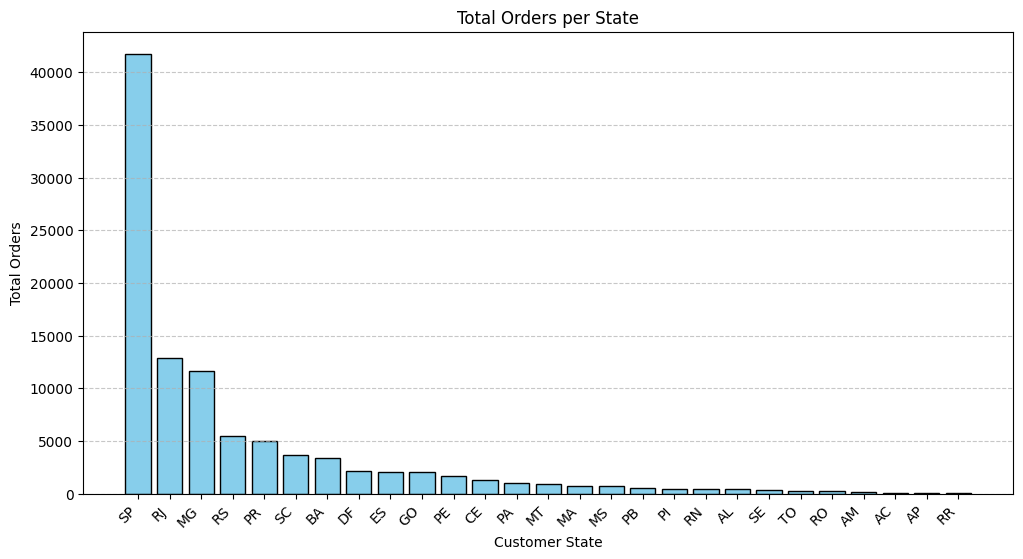

In [58]:
# MEMBUAT TOTAL ORDER PER STATE MENGGUNAKAN BAR PLOT
plt.figure(figsize=(12, 6))
plt.bar(orders_per_state['customer_state'], orders_per_state['total_orders'], color='skyblue', edgecolor='black')

plt.title('Total Orders per State')
plt.xlabel('Customer State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')  # ROTASI SUMBU X
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Dari data visualisasi di atas, distribusinya tidak merata. Negara bagian Sao Paulo merupakan negara bagian dengan jumlah pesanan tertinggi sebanyak lebih dari 40000 dan negara bagian lainnya di bawah dari 15000

### Pertanyaan 2:

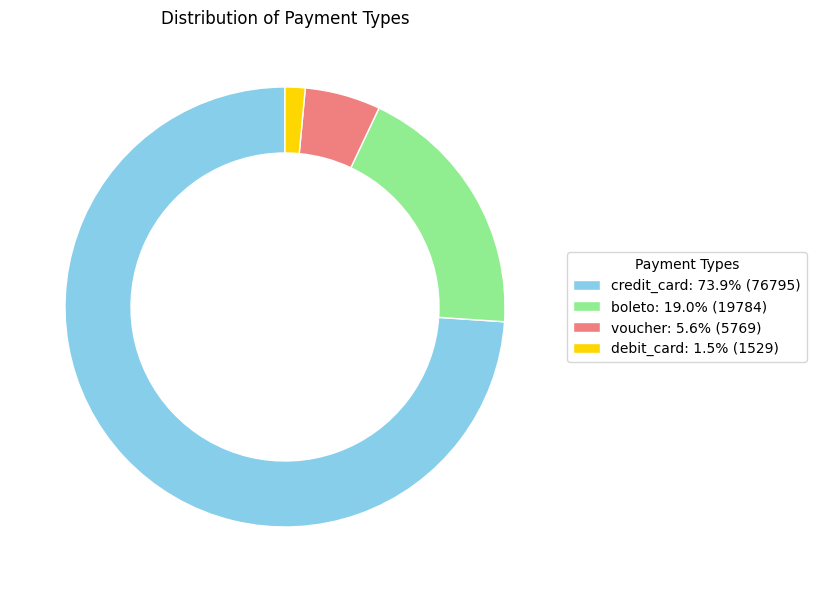

In [59]:
# MEMBUAT PIE CHART UNTUK DISTRIBUSI DARI TIAP JENIS PEMBAYARAN
plt.figure(figsize=(10, 8))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']
wedges, texts, autotexts = plt.pie(payment_distribution, startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'),
                                   autopct='', pctdistance=0.85)

# MEMBUAT LABEL UNTUK PERSENTASE DAN JUMLAH
legend_labels = [f"{label}: {percentage:.1f}% ({count})" for label, percentage, count in
                 zip(payment_distribution.index, (payment_distribution / payment_distribution.sum()) * 100,
                     payment_distribution)]

plt.legend(wedges, legend_labels, title='Payment Types', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.subplots_adjust(left=0.0, right=0.55)
plt.title('Distribution of Payment Types')

plt.show()

Distribusi jenis pembayaran yang dipakai oleh customer tidak merata, karena 73% customer memakai credit card dan sisanya menggunakan selain credit card

## Conclusion

- Distribusi pemesanan berdasarkan lokasi pemesanan terbilang cukup tidak merata, pemesanan terbanyak ada pada Sao Paulo dengan nilai lebih dari 40000 pemesanan, sedangkan state lain terhitung hanya dibawah 15000 pemesanan dari total 99441 pemesanan yang  dilakukan. Dapat disimpulkan Sao Paulo merupakan state dengan customer terbanyak.
- Distribusi pemesanan berdasarkan tipe pembayaran juga tidak merata, customer yang melakukan pembayaran menggunakan credit card ada sekitar 73% dari 103877 pembayaran yang telah dilakukan atau sekitar 76795. Dapat disimpulkan bahwa pembayaran credit card merupakan  tipe pembayaran yang cukup disukai oleh customer.


In [60]:
# SAVE DATA
customer_df.to_csv('customer_df_new.csv', index=False)
orders_df.to_csv('orders_df_new.csv',  index=False)
payment_df.to_csv('payment_df_new.csv', index=False)